In [2]:
setwd('/Users/yaolanqiu/Desktop/NYU/rotation/Rotation2/Week3/from dr.tarpey')
source("cvxcluster-0513.R")

In [12]:
library('lme4')


<span style="color:blue">I was confused about the dimensions of the following equation. I just wanted to add the subscript i in the equation and specify the euqation for each subject.</span>

In [13]:
# read in data
dat = read.table("hcaf.dat", header=T)
d0 = dat[dat$trt == 0,]
d1 = dat[dat$trt == 1,]
head(dat)

subj,trt,y,age,BaselineCGI,t1,responder
2497,0,25,29,4,0,0
2497,0,18,29,4,1,0
2497,0,11,29,4,2,0
2497,0,9,29,4,3,0
2497,0,19,29,4,4,0
2497,0,15,29,4,5,0


In [14]:
# create new covariates
cov01 = rnorm(length(unique(d0$subj)),5,1)
cov02 = rnorm(length(unique(d0$subj)),10,1)
newcov0 = data.frame(subj = unique(d0$subj), newcov1 = cov01, newcov2 = cov02)
d0 = merge(d0,newcov0, by = 'subj')
head(d0)

subj,trt,y,age,BaselineCGI,t1,responder,newcov1,newcov2
2497,0,25,29,4,0,0,5.115883,10.0736
2497,0,18,29,4,1,0,5.115883,10.0736
2497,0,11,29,4,2,0,5.115883,10.0736
2497,0,9,29,4,3,0,5.115883,10.0736
2497,0,19,29,4,4,0,5.115883,10.0736
2497,0,15,29,4,5,0,5.115883,10.0736


In [15]:
# create new covariates
cov01 = rnorm(length(unique(d1$subj)),10,1)
cov02 = rnorm(length(unique(d1$subj)),5,1)
newcov1 = data.frame(subj = unique(d1$subj), newcov1 = cov01, newcov2 = cov02)
d1 = merge(d1,newcov1, by = 'subj')
head(d1)

subj,trt,y,age,BaselineCGI,t1,responder,newcov1,newcov2
2500,1,24,29,4,0,0,10.031118,4.965798
2500,1,22,29,4,1,0,10.031118,4.965798
2500,1,19,29,4,2,0,10.031118,4.965798
2500,1,25,29,4,3,0,10.031118,4.965798
2509,1,24,31,4,0,1,9.820069,7.081584
2509,1,10,31,4,1,1,9.820069,7.081584


In [16]:
# new covariate, which is the combination of the two new covariates
# let's make it a simple summation first
d0$newcov = d0$newcov1 + d0$newcov2 
d1$newcov = d1$newcov1 + d1$newcov2

In [18]:
# Fit LME
fit_d0 = lmer(y ~ t1 + I(t1^2) + newcov + newcov * t1 + newcov * I(t1^2) + (t1+I(t1^2)|subj),
                data = d0, REML = FALSE)
fit_d1 = lmer(y ~ t1 + I(t1^2) + newcov + newcov * t1 + newcov * I(t1^2) + (t1+I(t1^2)|subj),
                data = d1, REML = FALSE)

singular fit


In [20]:
summary(fit_d0)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y ~ t1 + I(t1^2) + newcov + newcov * t1 + newcov * I(t1^2) +  
    (t1 + I(t1^2) | subj)
   Data: d0

     AIC      BIC   logLik deviance df.resid 
  5970.0   6033.6  -2972.0   5944.0      965 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2516 -0.5961 -0.0336  0.5374  2.9550 

Random effects:
 Groups   Name        Variance Std.Dev. Corr       
 subj     (Intercept)  2.1349  1.4611              
          t1           5.1128  2.2612    0.96      
          I(t1^2)      0.1213  0.3482   -0.98 -0.88
 Residual             16.1672  4.0208              
Number of obs: 978, groups:  subj, 162

Fixed effects:
               Estimate Std. Error t value
(Intercept)    29.31307    3.39179   8.642
t1             -9.08822    3.28602  -2.766
I(t1^2)         0.98201    0.55240   1.778
newcov         -0.41718    0.22569  -1.849
t1:newcov       0.32262    0.21865   1.476
I(t1^2):newcov -0.03216    0.03675  -0.875

Cor

In [21]:
summary(fit_d1)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y ~ t1 + I(t1^2) + newcov + newcov * t1 + newcov * I(t1^2) +  
    (t1 + I(t1^2) | subj)
   Data: d1

     AIC      BIC   logLik deviance df.resid 
  7281.4   7347.9  -3627.7   7255.4     1218 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2540 -0.5487 -0.0448  0.5174  3.4531 

Random effects:
 Groups   Name        Variance Std.Dev. Corr       
 subj     (Intercept)  8.0620  2.8394              
          t1           7.5757  2.7524    0.07      
          I(t1^2)      0.1552  0.3939   -0.22 -0.93
 Residual             11.7507  3.4279              
Number of obs: 1231, groups:  subj, 196

Fixed effects:
               Estimate Std. Error t value
(Intercept)    27.49879    3.27545   8.395
t1             -9.88284    2.90459  -3.402
I(t1^2)         1.16388    0.44727   2.602
newcov         -0.25199    0.21587  -1.167
t1:newcov       0.36967    0.19139   1.932
I(t1^2):newcov -0.05253    0.02945  -1.784

Co

### Plot the $\lambda(x)$ v.s. $w$ figure

The $\lambda$ here is just 

$$\lambda(z_i|w_i) = \frac{f_2(z_i|w_i)}{f_1(z_i|w_i) + f_2(z_i|w_i)}$$

Steps:

1. Fit LME, calculate the mean and variance of MVN for drug group and placebo group, separately.
<br>
2. Generate data from the above MVN by using the mean and variance calculated from the LME
<br>
3. Input values (the value from above generation) and selected w values into the $\lambda$ function.
<br>
4. Draw the plot

In [23]:
beta0 = as.matrix(fixef(fit_d0)[1:3])
gamma0 = as.matrix(fixef(fit_d0)[4:6])
beta1 = as.matrix(fixef(fit_d1)[1:3])
gamma1 = as.matrix(fixef(fit_d1)[4:6])

In [26]:
lambda2 = function(xx, mu0, mu1, sigma0, sigma1){
  
  quadratic0 = function(a,b) {
    X = matrix(c(a,b),nrow=2)
    Q = (-1/2)*t(X-mu0)%*%solve(sigma0)%*%(X-mu0)
  }
  quadratic1 = function(a,b) {
    X = matrix(c(a,b),nrow=2)
    Q = (-1/2)*t(X-mu1)%*%solve(sigma1)%*%(X-mu1)
  }
  
  f0 = (1/(2*pi))*(1/sqrt(det(sigma0)))*exp(quadratic0(xx[1],xx[2]))
  f1 = (1/(2*pi))*(1/sqrt(det(sigma1)))*exp(quadratic1(xx[1],xx[2]))
  
  return(f1/(f1 + f0))
}


In [30]:
drg_group = c()
pat_group = c()
Ww = c()
for(w in seq(10,20,1)){
  
  m0 = beta0 + gamma0 * w; m0 = m0[2:3]
  m1 = beta1 + gamma1 * w; m1 = m1[2:3]
  D0 = as.matrix(VarCorr(fit_d0)$subj)[2:3, 2:3]
  D1 = as.matrix(VarCorr(fit_d1)$subj)[2:3, 2:3]
  
  mu0 = matrix(m0, nrow=2)
  sigma0 = D0
  mu1 = matrix(m1, nrow=2)
  sigma1 = D1
  
  pat = mvrnorm(10, mu0, sigma0)
  drg = mvrnorm(10, mu1, sigma1)
  
  for(i in 1:10){
    pat_group = c(pat_group, lambda2(pat[i,], mu0, mu1, sigma0, sigma1))
  }
  
  for(i in 1:10){
    drg_group = c(drg_group, lambda2(drg[i,], mu0, mu1, sigma0, sigma1))
  }
  
  Ww = c(Ww, rep(w, 10))
}

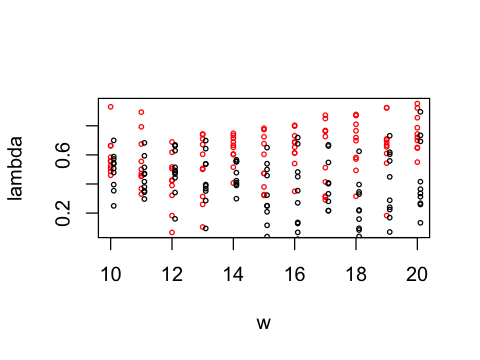

In [35]:
options(repr.plot.width=4, repr.plot.height=3)
plot(Ww, drg_group, cex = 0.5, col = 'red', ylab = 'lambda', xlab= 'w')
points(Ww+0.1, pat_group, cex = 0.5)